In [ ]:
!gdown 1y8xhCM_rVCgxOPSF3VtVkFxnwxtBlH0x

Downloading...
From (original): https://drive.google.com/uc?id=1y8xhCM_rVCgxOPSF3VtVkFxnwxtBlH0x
From (redirected): https://drive.google.com/uc?id=1y8xhCM_rVCgxOPSF3VtVkFxnwxtBlH0x&confirm=t&uuid=61190d49-9e6a-4134-a12d-5d92eed817b2
To: /content/adopt.py
100% 18.3k/18.3k [00:00<00:00, 55.2MB/s]


## Load Data

In [ ]:
import torch
from torch import nn
from adopt import ADOPT
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision.datasets import FashionMNIST
import torchvision.transforms as transforms
import numpy as np
import torch.optim as optim
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
torch.manual_seed(42)

In [ ]:
batch_size = 512
num_epochs = 300
lr = 0.001

In [ ]:
train_dataset = FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
train_loader = DataLoader(train_dataset, batch_size, shuffle=True)
test_dataset = FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
test_loader = DataLoader(test_dataset, batch_size)

100%|██████████| 26.4M/26.4M [00:01<00:00, 16.7MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 268kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 4.90MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 8.97MB/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



## Modeling

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_dims, hidden_dims, output_dims):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(input_dims, hidden_dims)
        self.layer2 = nn.Linear(hidden_dims, hidden_dims)
        self.layer3 = nn.Linear(hidden_dims, hidden_dims)
        self.layer4 = nn.Linear(hidden_dims, hidden_dims)
        self.layer5 = nn.Linear(hidden_dims, hidden_dims)
        self.output = nn.Linear(hidden_dims, output_dims)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = nn.Flatten()(x)
        x = self.layer1(x)
        x = self.sigmoid(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        x = self.layer3(x)
        x = self.sigmoid(x)
        x = self.layer4(x)
        x = self.sigmoid(x)
        x = self.layer5(x)
        x = self.sigmoid(x)
        out = self.output(x)
        return out

In [ ]:
model = MLP(input_dims=784, hidden_dims=128, output_dims=10).to(device)
criterion = nn.CrossEntropyLoss()

# link paper: https://arxiv.org/abs/2411.02853
################## YOUR CODE HERE ##################
"""Cấu hình ADOPT theo yêu cầu đề bài sử dụng ADOPT module"""
optimizer = ADOPT(model.parameters(), lr=lr)
####################################################


## ADOPT

In [ ]:
train_losses = []
train_acc = []
val_losses = []
val_acc = []
for epoch in range(num_epochs):
    model.train()
    t_loss = 0
    t_acc = 0
    cnt = 0
    for X, y in train_loader:
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        t_loss += loss.item()
        t_acc += (torch.argmax(outputs, 1) == y).sum().item()
        cnt += len(y)
    t_loss /= len(train_loader)
    train_losses.append(t_loss)
    t_acc /= cnt
    train_acc.append(t_acc)

    model.eval()
    v_loss = 0
    v_acc = 0
    cnt = 0
    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            outputs = model(X)
            loss = criterion(outputs, y)
            v_loss += loss.item()
            v_acc += (torch.argmax(outputs, 1)==y).sum().item()
            cnt += len(y)
    v_loss /= len(test_loader)
    val_losses.append(v_loss)
    v_acc /= cnt
    val_acc.append(v_acc)
    print(f"Epoch {epoch+1}/{num_epochs}, Train_Loss: {t_loss:.4f}, Train_Acc: {t_acc:.4f}, Validation Loss: {v_loss:.4f}, Val_Acc: {v_acc:.4f}")

Epoch 1/300, Train_Loss: 2.3577, Train_Acc: 0.0992, Validation Loss: 2.3029, Val_Acc: 0.1000
Epoch 2/300, Train_Loss: 2.3028, Train_Acc: 0.1000, Validation Loss: 2.3027, Val_Acc: 0.1000
Epoch 3/300, Train_Loss: 2.3027, Train_Acc: 0.1000, Validation Loss: 2.3026, Val_Acc: 0.1000
Epoch 4/300, Train_Loss: 2.3027, Train_Acc: 0.0990, Validation Loss: 2.3026, Val_Acc: 0.1000
Epoch 5/300, Train_Loss: 2.3027, Train_Acc: 0.0989, Validation Loss: 2.3026, Val_Acc: 0.1000
Epoch 6/300, Train_Loss: 2.3026, Train_Acc: 0.0992, Validation Loss: 2.3026, Val_Acc: 0.1000
Epoch 7/300, Train_Loss: 2.3027, Train_Acc: 0.0992, Validation Loss: 2.3026, Val_Acc: 0.1000
Epoch 8/300, Train_Loss: 2.3026, Train_Acc: 0.0983, Validation Loss: 2.3026, Val_Acc: 0.1000
Epoch 9/300, Train_Loss: 2.3027, Train_Acc: 0.0970, Validation Loss: 2.3026, Val_Acc: 0.1000
Epoch 10/300, Train_Loss: 2.3026, Train_Acc: 0.0999, Validation Loss: 2.3026, Val_Acc: 0.1000
Epoch 11/300, Train_Loss: 2.3026, Train_Acc: 0.0981, Validation Loss:

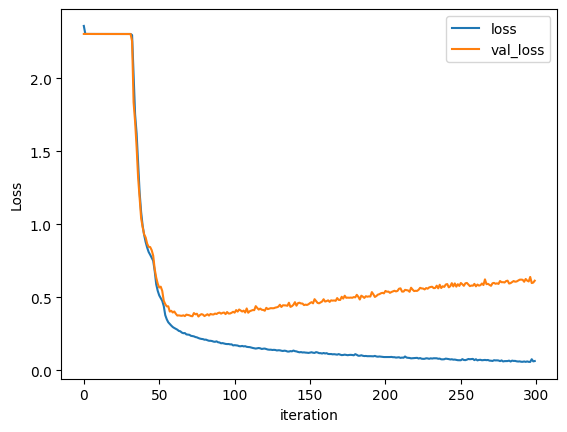

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='loss')
plt.plot(val_losses, label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

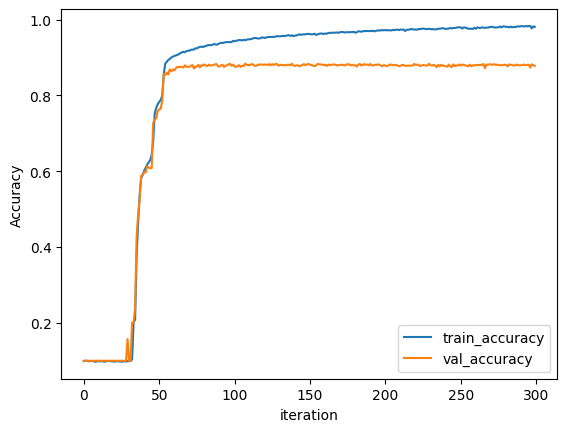

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_acc, label='train_accuracy')
plt.plot(val_acc, label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()